# Photo-nuclear physics v2.3.0 validation
### Omar Moreno, SLAC National Accelerator Laboratory

---

Detector: v12


In [1]:
import warnings
warnings.filterwarnings("ignore")

import uproot4
import awkward1 as ak
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import mplhep

In [2]:
def errors(values): 
    
    err = [np.sqrt(x) for x in values]
    errmin = []
    errmax = []
    for x,err in zip(values,err):
        errmin.append(x-err/2)
        errmax.append(x+err/2)

    return errmin, errmax
    
def draw_histogram1D(ax, histo, **kargs):
    
    values = histo.values()[1:-1]
    xedges = histo.edges(0)[1:-1]
    bin_centers = (xedges + (xedges[1] - xedges[0])/2)[:-1]
    
    err_min = np.zeros(len(values))
    err_max = np.zeros(len(values))
    if 'errors' in kargs: 
        err_min, err_max = errors(values)
    
    if 'scale' in kargs: 
        values = values*kargs['scale']
    
    if 'norm' in kargs:
        if kargs['norm'] == 1:
            integral = np.sum(values)
        else: 
            integral = kargs['norm']
            ax.set_ylabel('Event Fraction')
            
        values = values/integral
        
        if 'errors' in kargs: 
            err_min = np.array(err_min)/integral
            err_max = np.array(err_max)/integral


        
    ls='-'
    if 'linestyle' in kargs: 
        ls = kargs['linestyle']
        
    if 'x_label' in kargs: 
        ax.set_xlabel(kargs['x_label'], fontsize=30)
        
    if 'y_label' in kargs: 
        ax.set_ylabel(kargs['y_label'], fontsize=30)
    
    if 'errors' in kargs: 
        errors
        
    color = None
    if 'color' in kargs:
        color = kargs['color']
    
    ax.vlines(bin_centers, err_min, err_max, color=color)
        
    label = ''
    if 'label' in kargs: 
        label = kargs['label']
        
        
    matplotlib.rcParams.update({'font.size': 22})
    
    ax.hist(bin_centers, bins=xedges, weights=values, alpha=0.5, linewidth=2, 
            edgecolor=color, label=label)
    
    ax.minorticks_on()
    ax.tick_params(which='major', length=10, width=2, direction='inout', labelsize=30)
    ax.tick_params(which='minor', length=5, width=2, direction='in', labelsize=30)
    
    if 'tick_labels' in kargs: 
        tick_labels = kargs['tick_labels']
        ax.set_xticklabels(tick_labels, fontdict={'fontsize': 15})
        ax.set_xticks(xedges[:(len(tick_labels) - len(xedges))])
        ax.tick_params(axis='x', which='minor', length=0)
        
        offset = matplotlib.transforms.ScaledTranslation((xedges[1] - xedges[0])/4, 0, fig.dpi_scale_trans)
        for label in ax.xaxis.get_majorticklabels(): 
            label.set_transform(label.get_transform() + offset)
        plt.xticks(rotation=75)
    
    ax.set_title('LDMX Simulation Internal', x=.75, fontweight='bold')
    
def draw_histogram2D(ax, histo, **kargs):
    values = histo.values()[1: -1, 1: -1]
    print(values[0])
    print(values[2])
 

In [3]:
histograms = uproot4.open('mc_8gev.root')
histograms_4gev = uproot4.open('mc_4gev.root')

event_types = ['', 'Nothing hard', 'n', 'nn', '$\geq$ 3n', '$\pi$', '$\pi\pi$',
               '$\pi_0$', '$\pi$A', '$\pi$2A', '$\pi\pi$A', '$\pi_0$A', 
               '$\pi_0$2A', '$\pi_0\pi$A', 'p', 'pp', 'pn', '$K_L^0$X', '$K$X', 
               '$K_S^0$X', 'exotics', 'multi-body']
event_types_compact = ['', 'n', '$K^{\pm}$X', '$K^0$', 'nn', 'soft', 'other']
n_event_types = ['', '', 'nn', 'pn', '$\pi^+$n', '$\pi^0$n']

In [4]:
eot_8gev=439650000000
eot_4gev=905400000000

ylabel = 'Event Fraction'
label_4gev = '4 GeV'
label_8gev = '8 GeV'

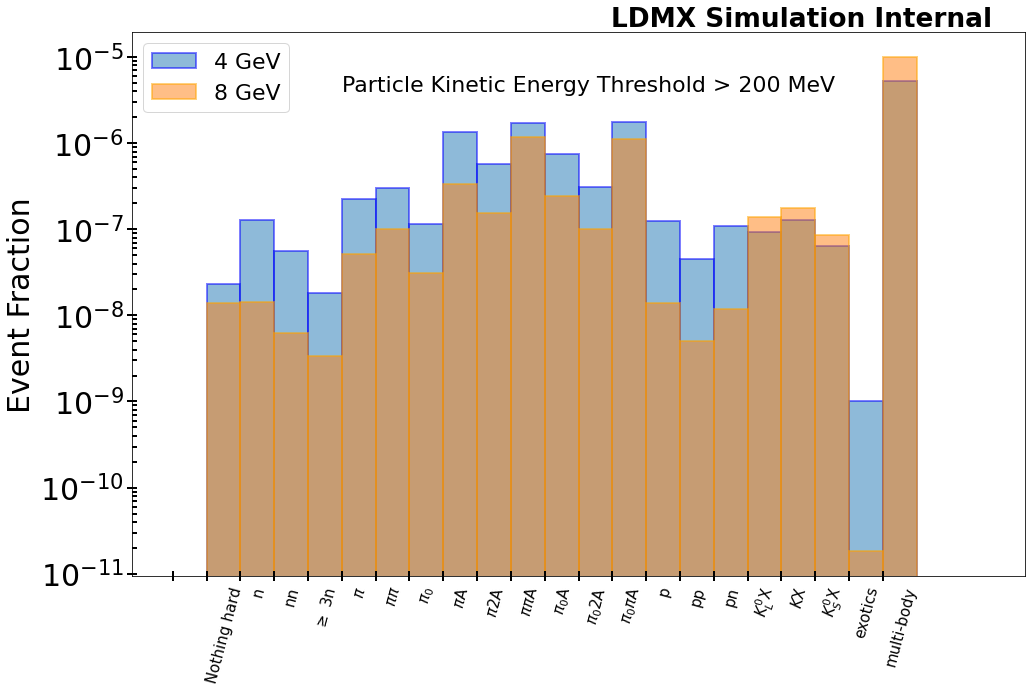

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
histo_name = 'pn/pn_event_type'
draw_histogram1D(ax, histograms_4gev[histo_name], norm=eot_4gev, 
                 tick_labels=event_types, color='blue', y_label=ylabel, label=label_4gev)
draw_histogram1D(ax, histograms[histo_name], norm=eot_8gev,
                 tick_labels=event_types, color='orange', y_label=ylabel, label=label_8gev)
ax.text(4, .000004, 'Particle Kinetic Energy Threshold > 200 MeV')
ax.legend()
ax.set_yscale("log")

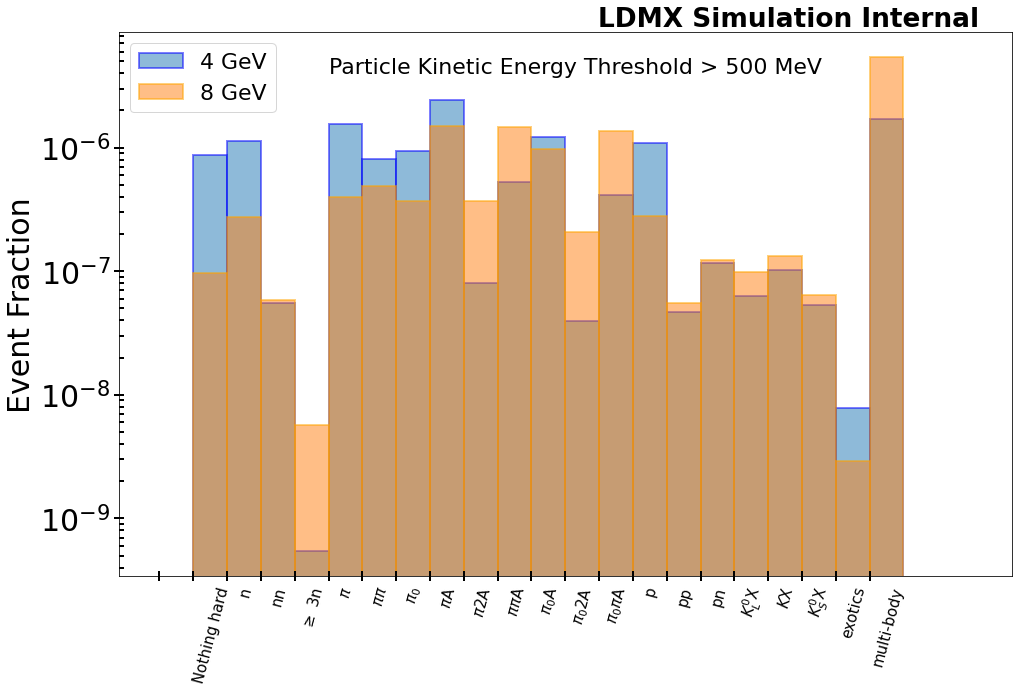

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
histo_name = 'pn/pn_event_type_500mev'
draw_histogram1D(ax, histograms_4gev[histo_name], norm=eot_4gev, 
                 tick_labels=event_types, color='blue', y_label=ylabel, label=label_4gev)
draw_histogram1D(ax, histograms[histo_name], norm=eot_8gev,
                 tick_labels=event_types, color='orange', y_label=ylabel, label=label_8gev)
ax.text(4, .000004, 'Particle Kinetic Energy Threshold > 500 MeV')
ax.legend()
ax.set_yscale("log")

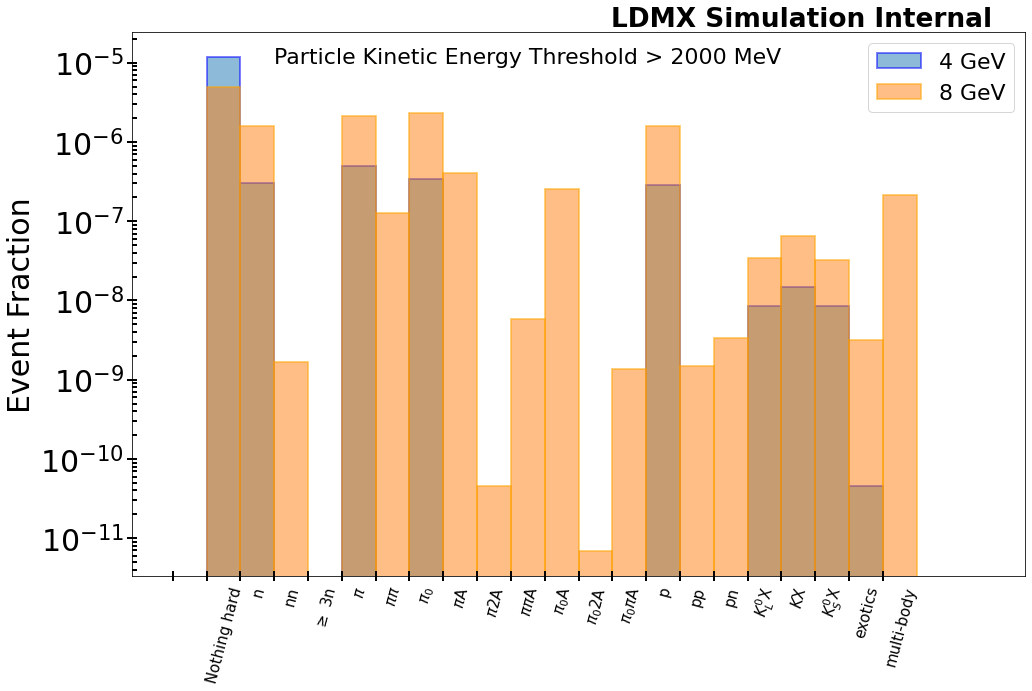

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
histo_name = 'pn/pn_event_type_2000mev'
draw_histogram1D(ax, histograms_4gev[histo_name], norm=eot_4gev, 
                 tick_labels=event_types, color='blue', y_label=ylabel, label=label_4gev)
draw_histogram1D(ax, histograms[histo_name], norm=eot_8gev,
                 tick_labels=event_types, color='orange', y_label=ylabel, label=label_8gev)
ax.text(2, .00001, 'Particle Kinetic Energy Threshold > 2000 MeV')
ax.legend()
ax.set_yscale("log")

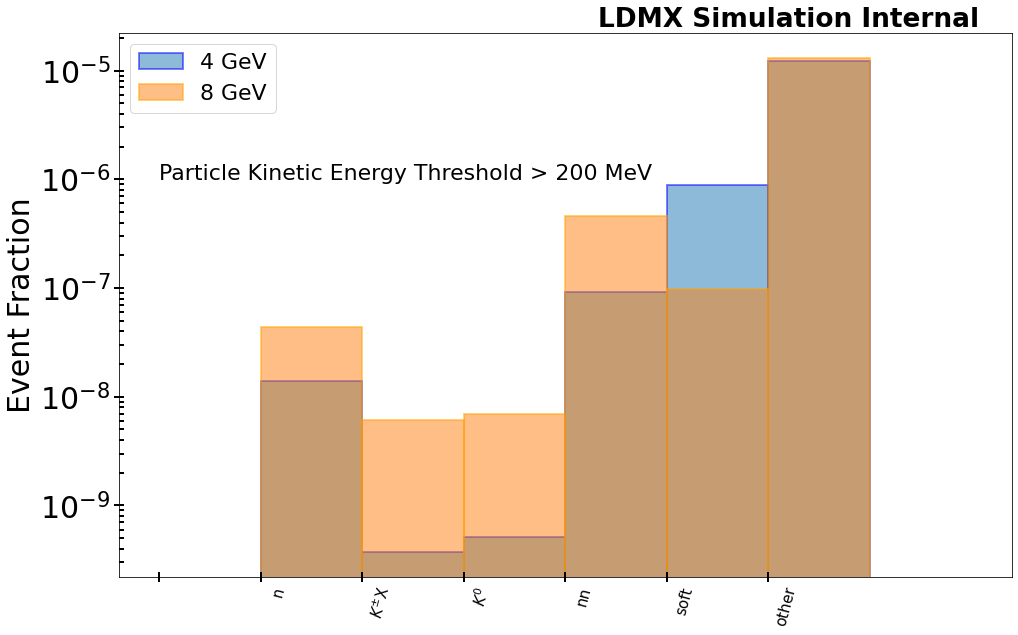

In [8]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
histo_name ='pn/pn_event_type_compact'
draw_histogram1D(ax, histograms_4gev[histo_name], norm=eot_4gev, 
                 tick_labels=event_types_compact, color='blue', y_label=ylabel, label=label_4gev)
draw_histogram1D(ax, histograms[histo_name], norm=eot_8gev,
                 tick_labels=event_types_compact, color='orange', y_label=ylabel, label=label_8gev)
ax.text(-1, .000001, 'Particle Kinetic Energy Threshold > 200 MeV')
ax.legend()
ax.set_yscale("log")

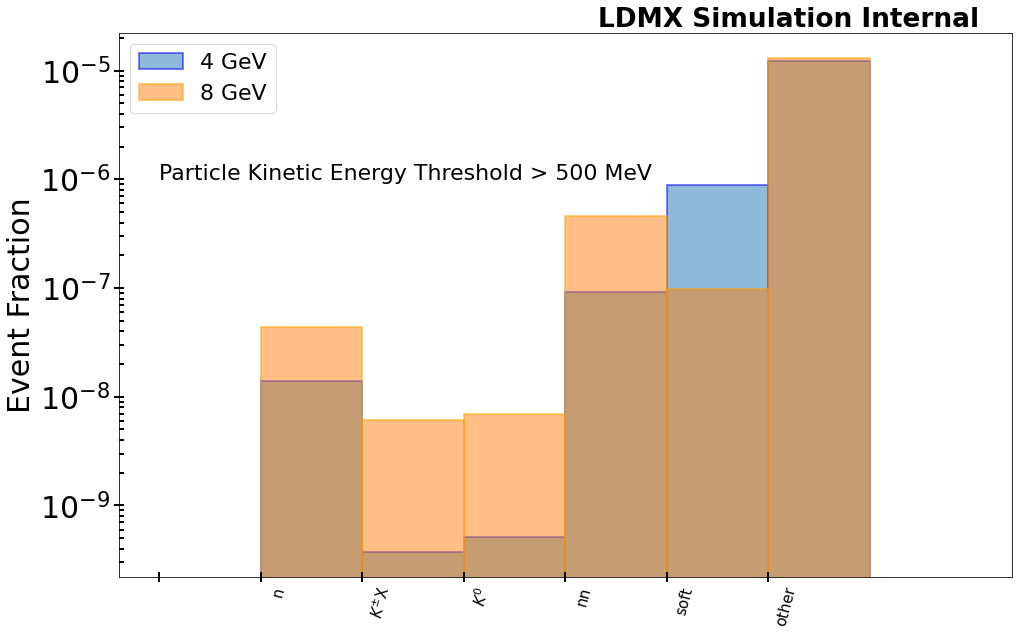

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
histo_name ='pn/pn_event_type_compact_500mev'
draw_histogram1D(ax, histograms_4gev[histo_name], norm=eot_4gev, 
                 tick_labels=event_types_compact, color='blue', y_label=ylabel, label=label_4gev)
draw_histogram1D(ax, histograms[histo_name], norm=eot_8gev,
                 tick_labels=event_types_compact, color='orange', y_label=ylabel, label=label_8gev)
ax.text(-1, .000001, 'Particle Kinetic Energy Threshold > 500 MeV')
ax.legend()
ax.set_yscale("log")

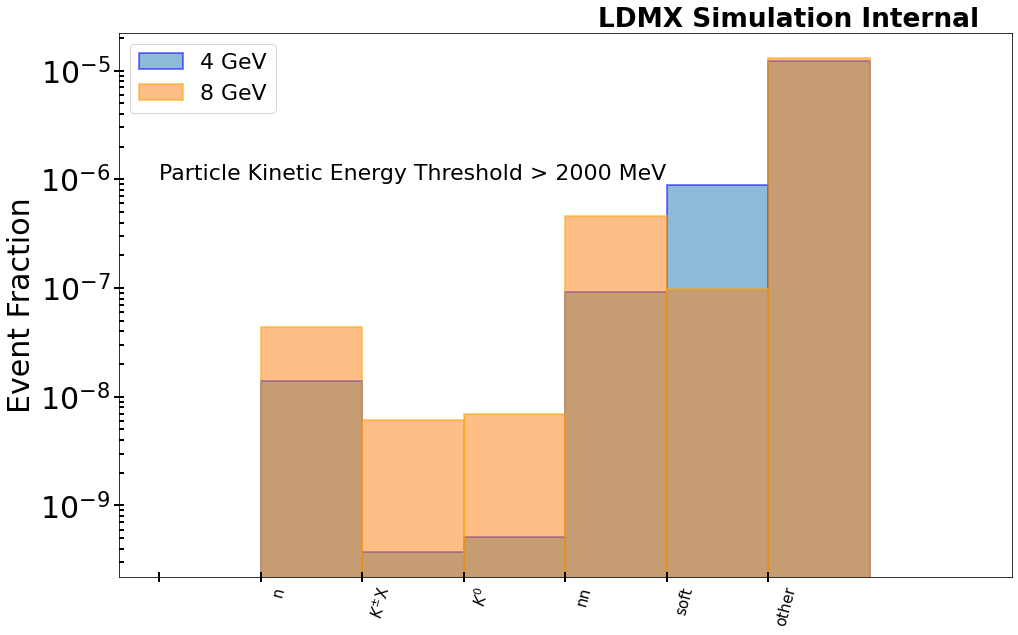

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
histo_name ='pn/pn_event_type_compact_2000mev'
draw_histogram1D(ax, histograms_4gev[histo_name], norm=eot_4gev, 
                 tick_labels=event_types_compact, color='blue', y_label=ylabel, label=label_4gev)
draw_histogram1D(ax, histograms[histo_name], norm=eot_8gev,
                 tick_labels=event_types_compact, color='orange', y_label=ylabel, label=label_8gev)
ax.text(-1, .000001, 'Particle Kinetic Energy Threshold > 2000 MeV')
ax.legend()
ax.set_yscale("log")

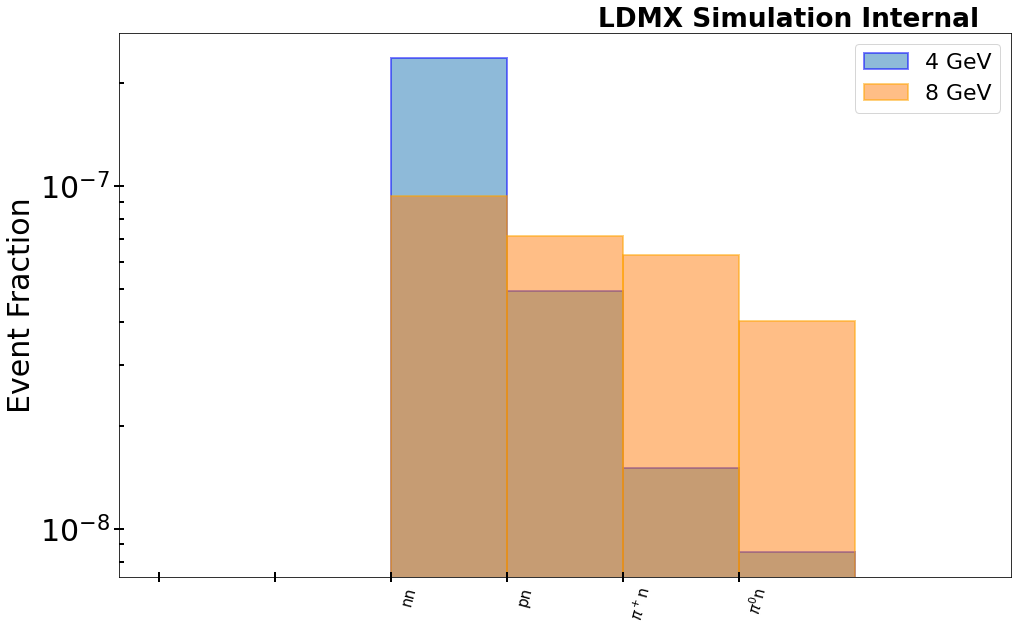

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
histo_name ='pn/pn_1n_event_type'
draw_histogram1D(ax, histograms_4gev[histo_name], norm=eot_4gev, 
                 tick_labels=n_event_types, color='blue', y_label=ylabel, label=label_4gev)
draw_histogram1D(ax, histograms[histo_name], norm=eot_8gev,
                 tick_labels=n_event_types, color='orange', y_label=ylabel, label=label_8gev)
ax.legend()
ax.set_yscale("log")

In [12]:
def draw_overlay(histo_name, x_label):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 10), facecolor='white')
    draw_histogram1D(ax, histograms_4gev[histo_name], norm=eot_4gev, errors=True,
                 x_label=x_label, label=label_4gev)
    draw_histogram1D(ax, histograms[histo_name], norm=eot_8gev, errors=True,
                 x_label=x_label, label=label_8gev)
    ax.set_yscale("log")
    ax.legend()
    
    return ax

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Photonuclear Multiplicity', ylabel='Event Fraction'>

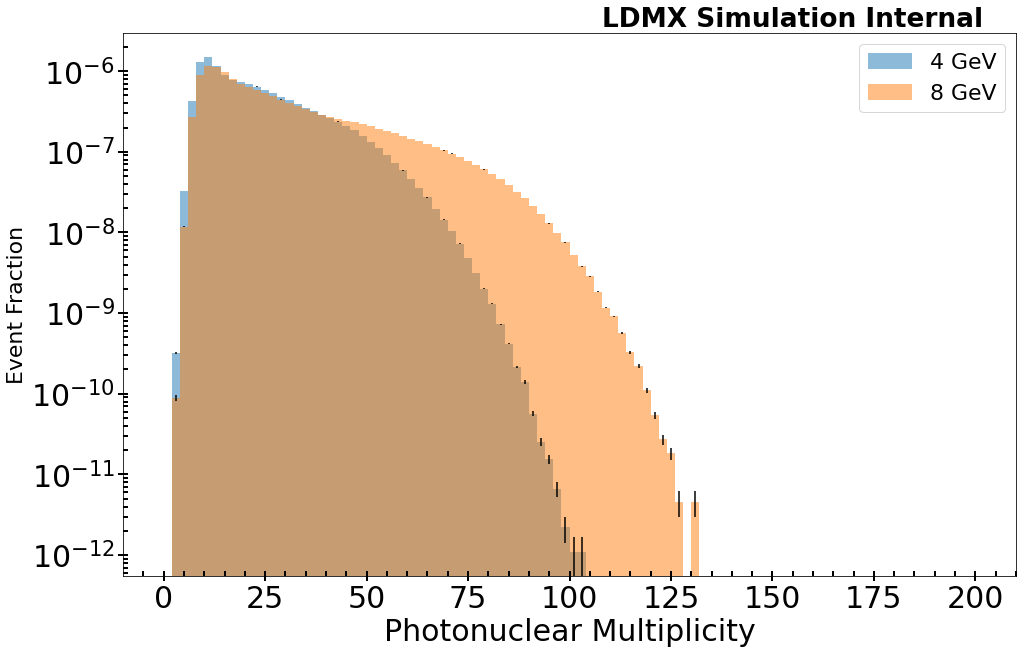

In [13]:
draw_overlay('pn/pn_pn_particle_mult', 'Photonuclear Multiplicity')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='$\\gamma$ Energy (MeV)', ylabel='Event Fraction'>

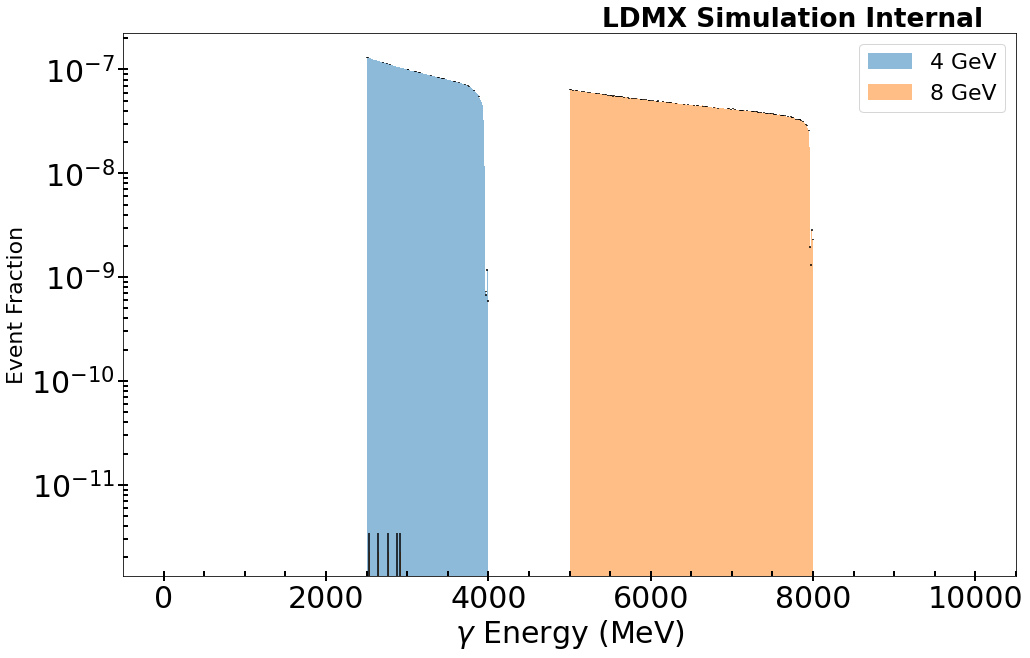

In [14]:
draw_overlay('pn/pn_pn_gamma_energy', '$\gamma$ Energy (MeV)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Neutron Energy (MeV)', ylabel='Event Fraction'>

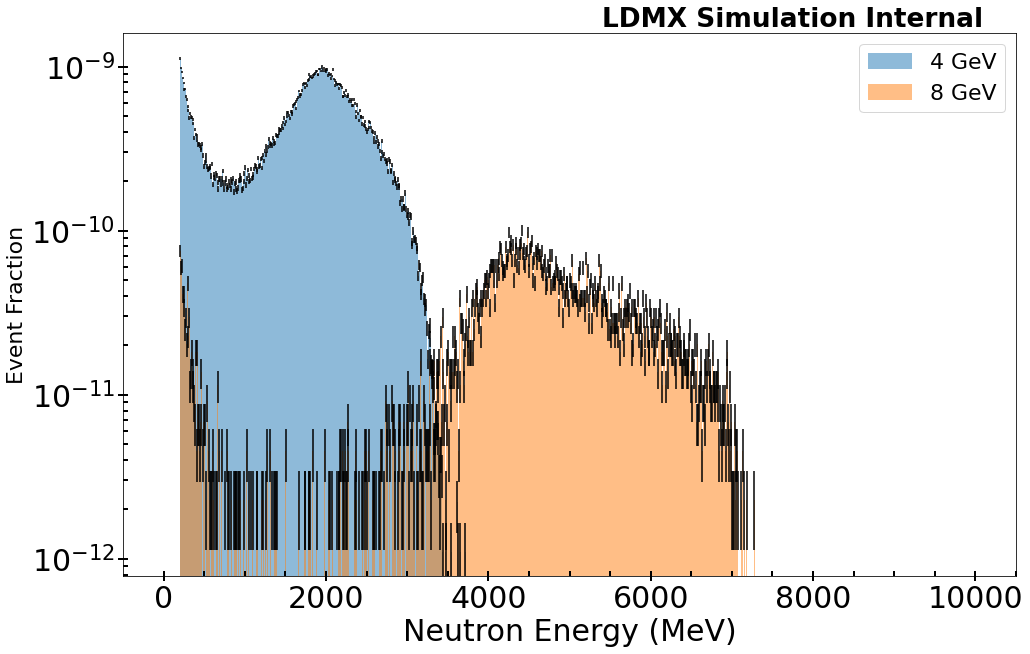

In [15]:
draw_overlay('pn/pn_1n_neutron_energy', 'Neutron Energy (MeV)' )

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='E($\\gamma_{PN}$) - E(n) (MeV)', ylabel='Event Fraction'>

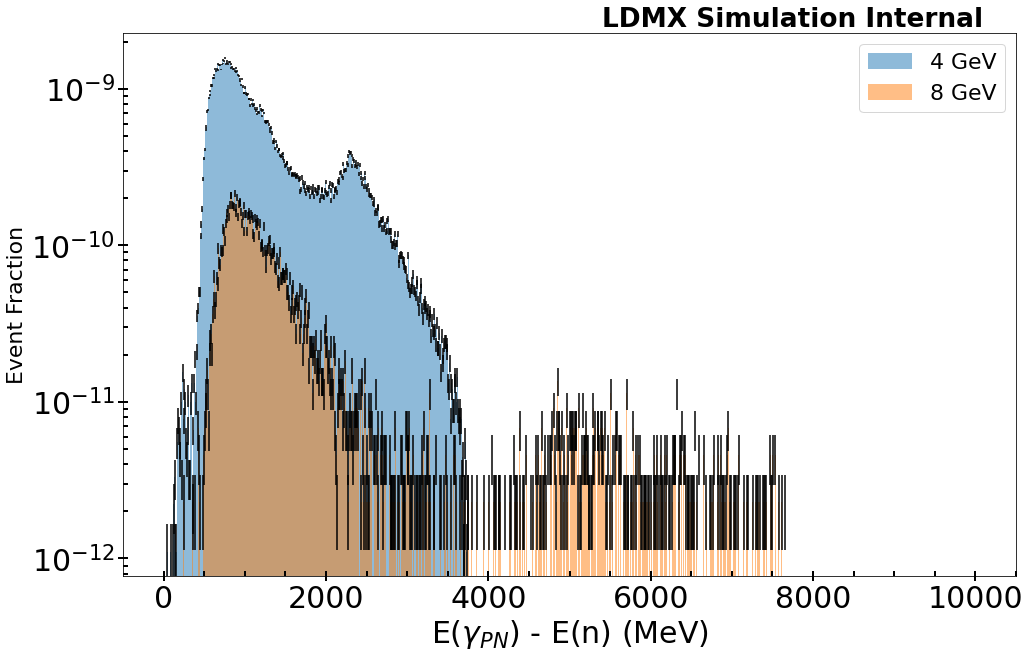

In [16]:
draw_overlay('pn/pn_1n_energy_diff', 'E($\gamma_{PN}$) - E(n) (MeV)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='E(n)/E($\\gamma_{PN}$)', ylabel='Event Fraction'>

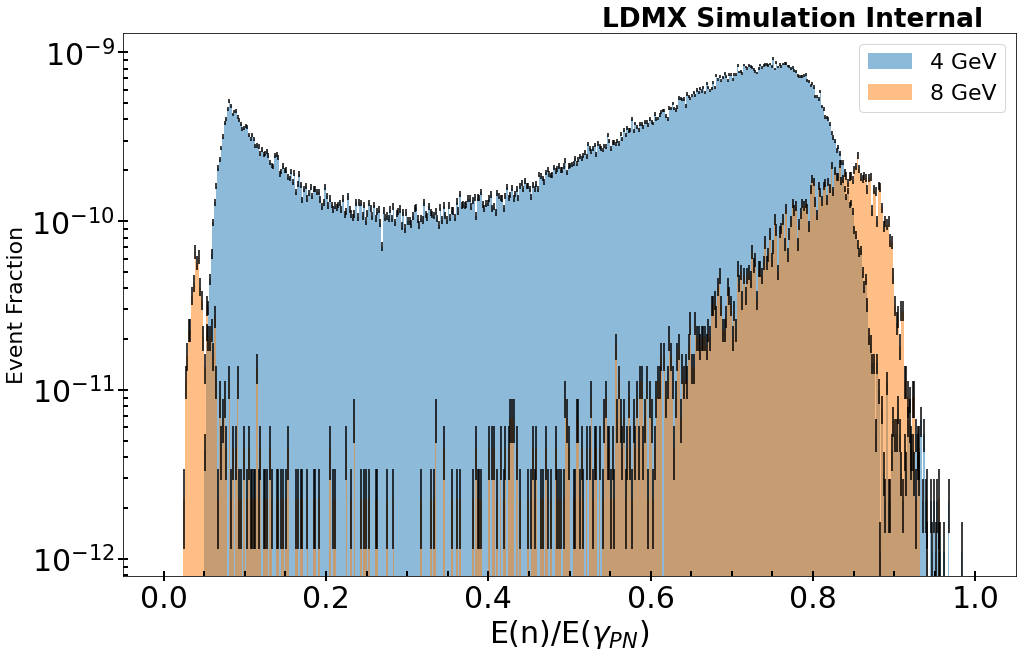

In [17]:
draw_overlay('pn/pn_1n_energy_frac', 'E(n)/E($\gamma_{PN}$)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Energy of second hardest neutron (MeV)', ylabel='Event Fraction'>

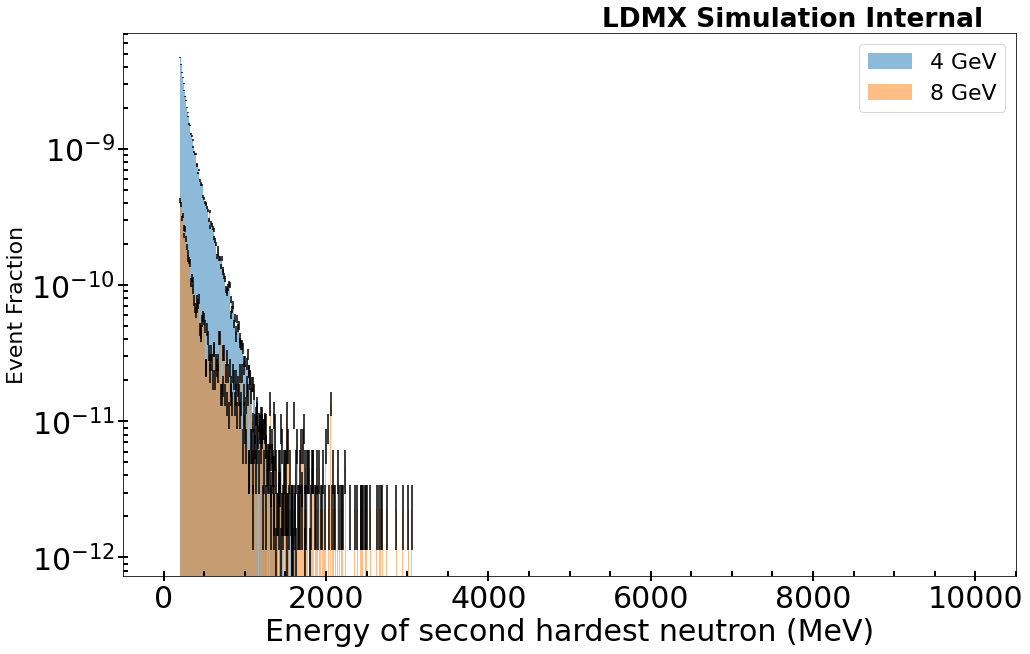

In [18]:
draw_overlay('pn/pn_2n_n2_energy', 'Energy of second hardest neutron (MeV)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Charged Kaon Energy (MeV)', ylabel='Event Fraction'>

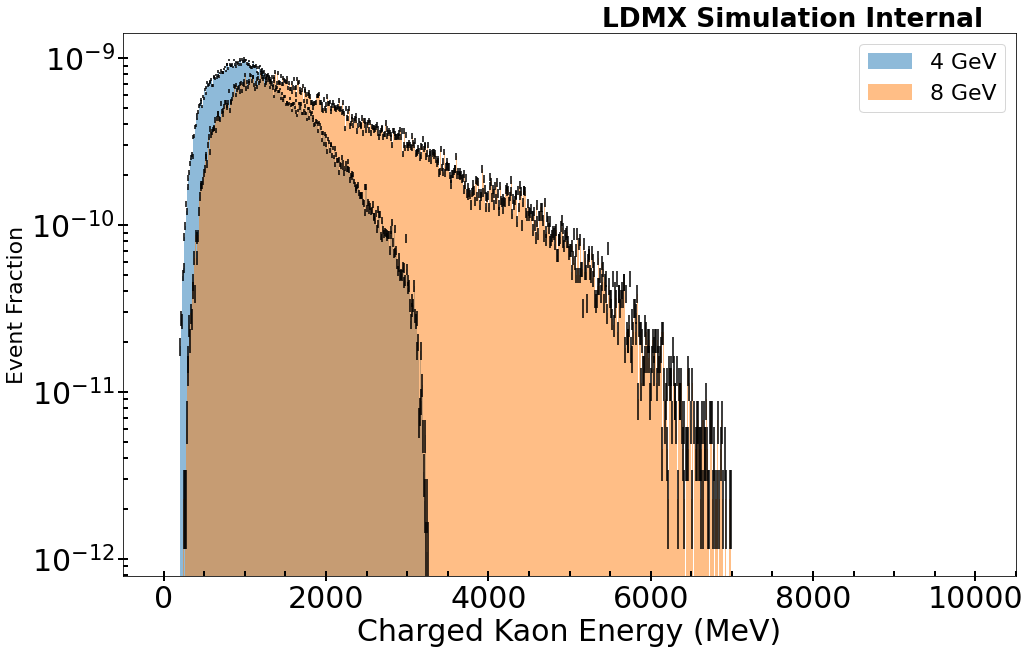

In [19]:
draw_overlay('pn/pn_1kp_energy', 'Charged Kaon Energy (MeV)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='E($\\gamma_{PN}$) - E($K^{\\pm}$) (MeV)', ylabel='Event Fraction'>

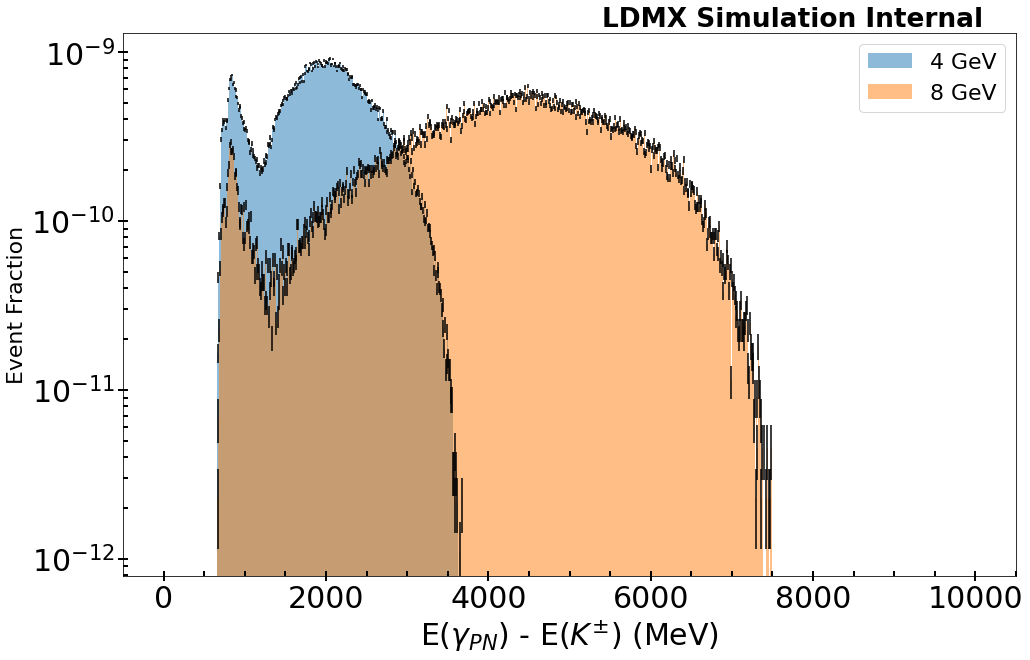

In [20]:
draw_overlay('pn/pn_1kp_energy_diff', 'E($\gamma_{PN}$) - E($K^{\pm}$) (MeV)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='E($K^{\\pm}$)/E($\\gamma_{PN}$)', ylabel='Event Fraction'>

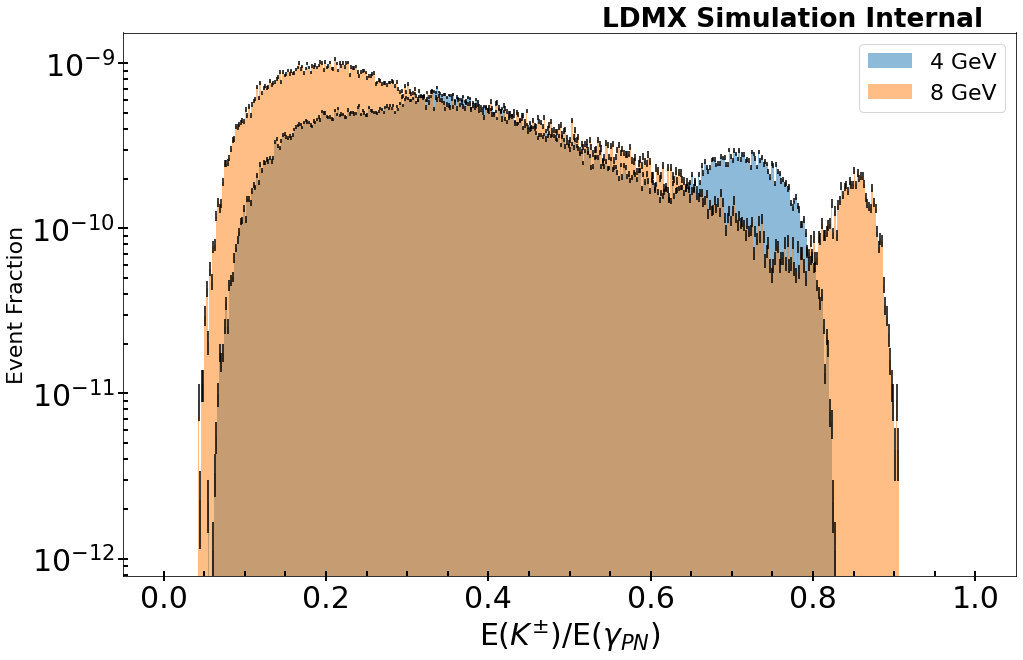

In [21]:
draw_overlay('pn/pn_1kp_energy_frac', 'E($K^{\pm}$)/E($\gamma_{PN}$)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='$K^0$ Energy (MeV)', ylabel='Event Fraction'>

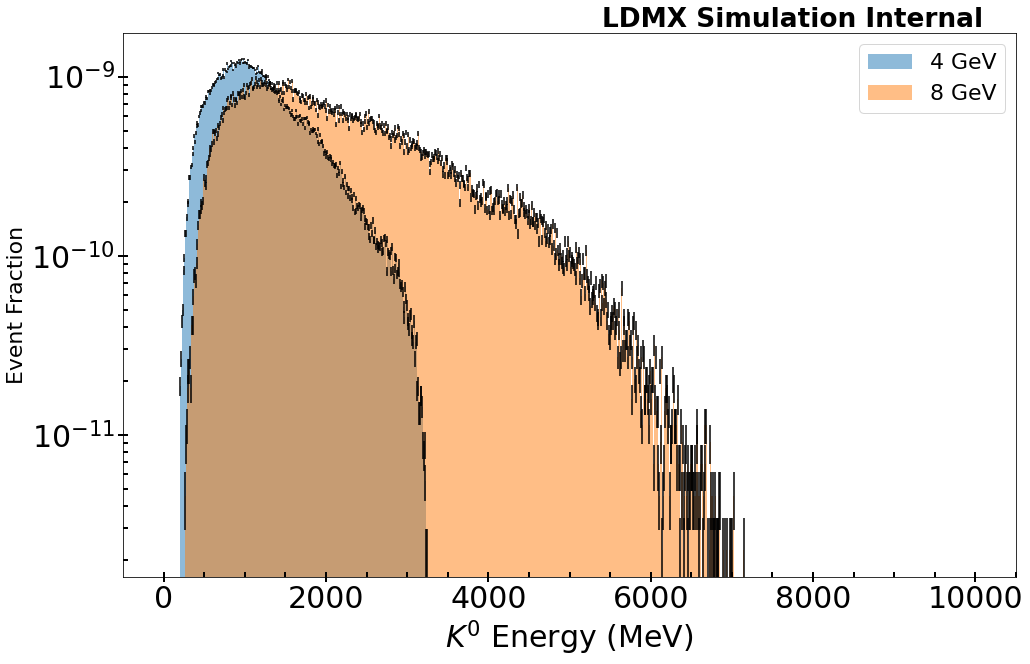

In [22]:
draw_overlay('pn/pn_1k0_energy', '$K^0$ Energy (MeV)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='E($\\gamma_{PN}$) - E($K^0$) (MeV)', ylabel='Event Fraction'>

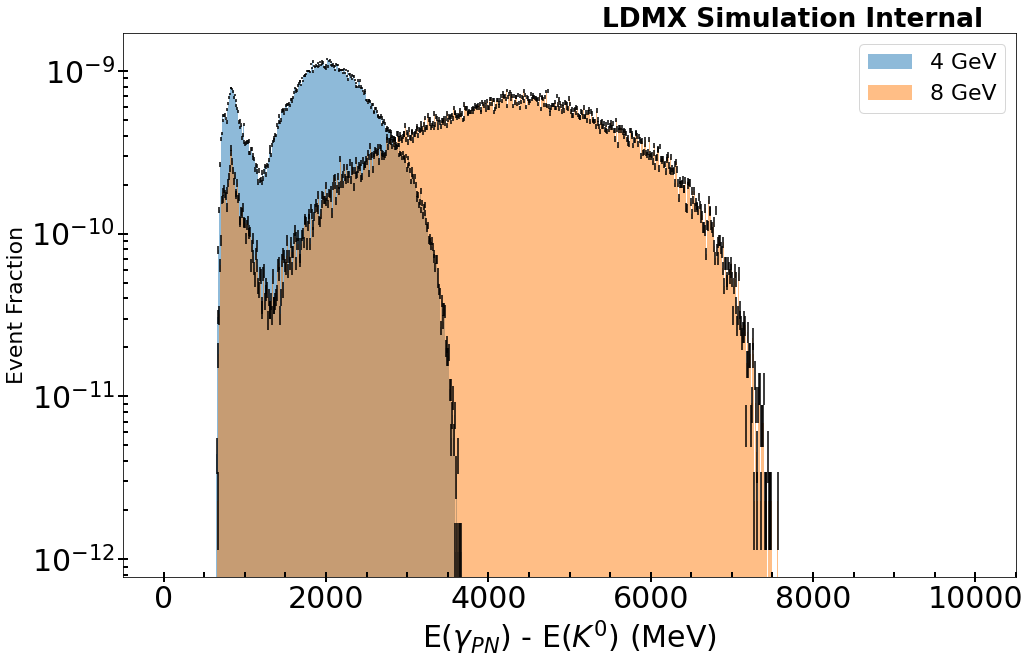

In [23]:
draw_overlay('pn/pn_1k0_energy_diff', 'E($\gamma_{PN}$) - E($K^0$) (MeV)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='E($K^0$)/E($\\gamma_{PN}$)', ylabel='Event Fraction'>

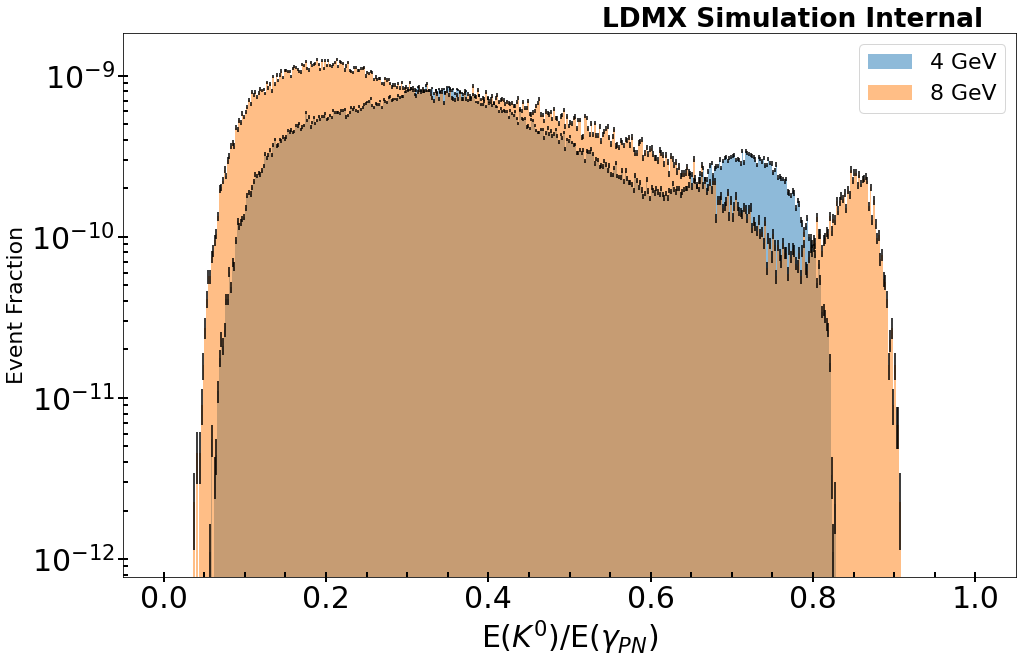

In [24]:
draw_overlay('pn/pn_1k0_energy_frac', 'E($K^0$)/E($\gamma_{PN}$)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='$\\gamma$ Interaction Vertex (mm)', ylabel='Event Fraction'>

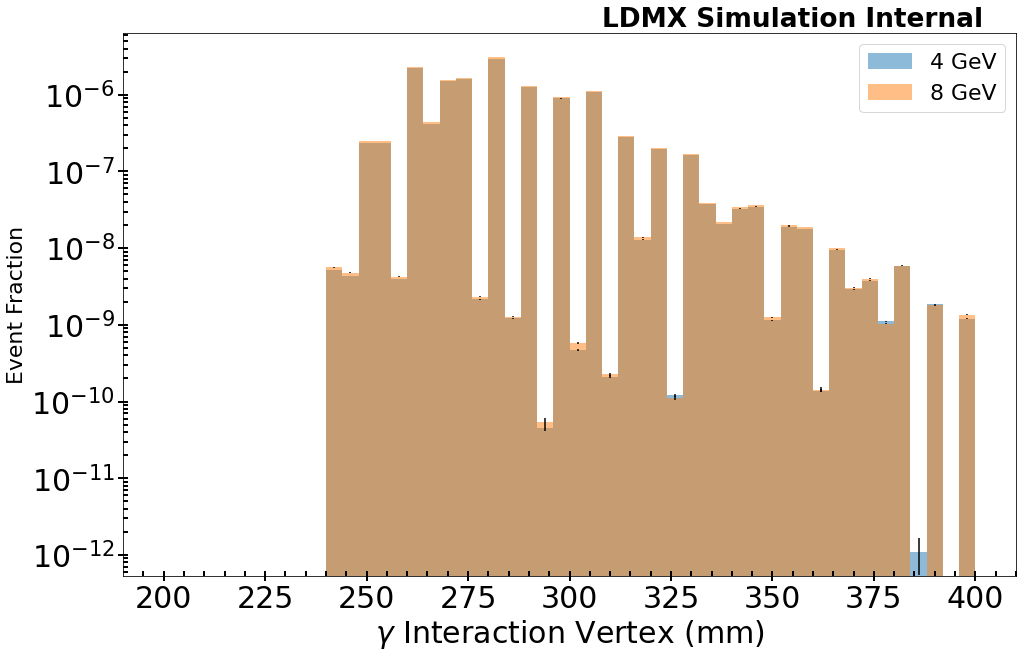

In [25]:
draw_overlay('pn/pn_pn_gamma_int_z', '$\gamma$ Interaction Vertex (mm)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='$\\gamma$ Vertex x (mm)', ylabel='Event Fraction'>

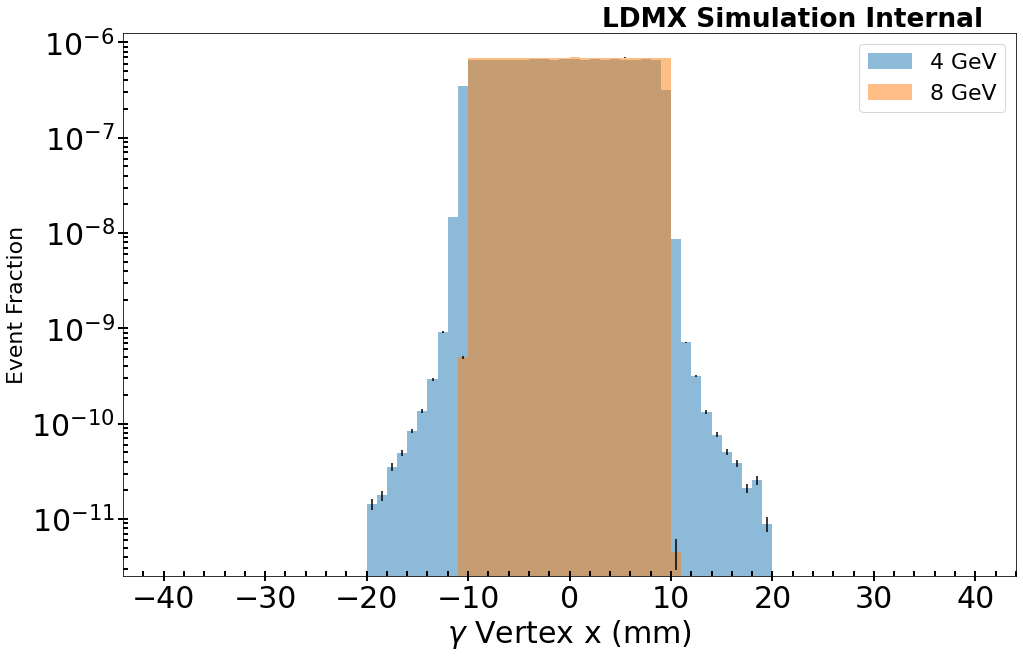

In [26]:
draw_overlay('pn/pn_pn_gamma_vertex_x', '$\gamma$ Vertex x (mm)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='$\\gamma$ Vertex y (mm)', ylabel='Event Fraction'>

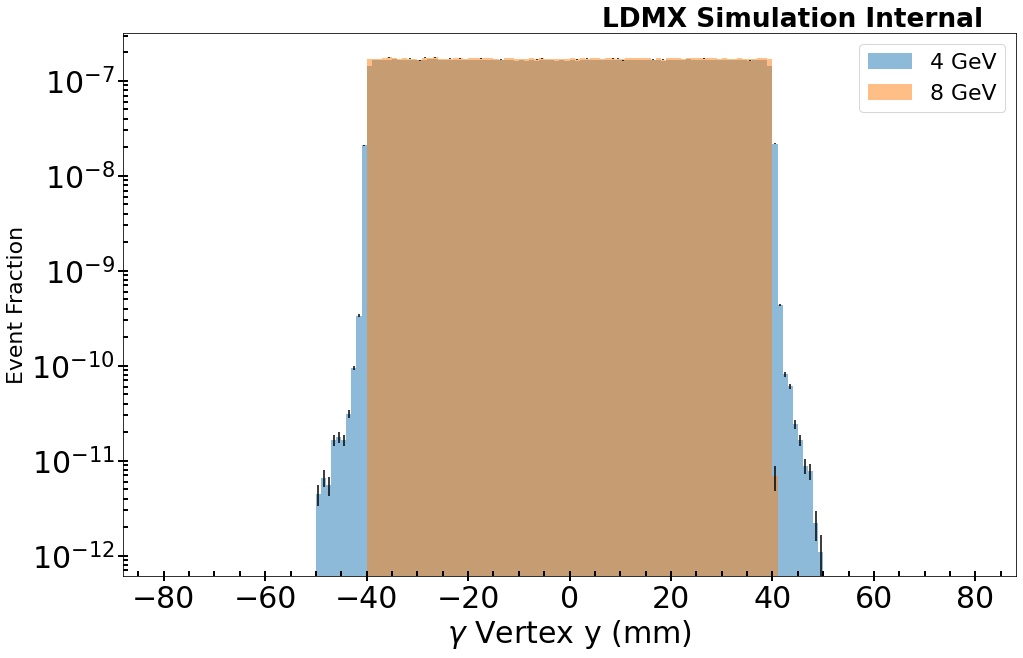

In [27]:
draw_overlay('pn/pn_pn_gamma_vertex_y', '$\gamma$ Vertex y (mm)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='$\\gamma$ Vertex z (mm)', ylabel='Event Fraction'>

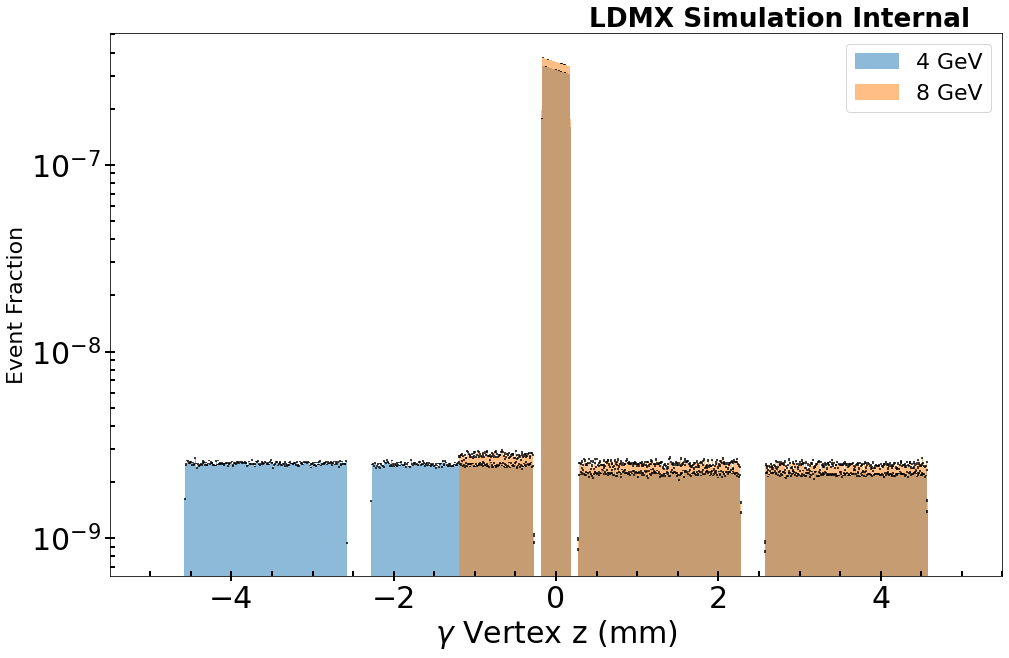

In [28]:
draw_overlay('pn/pn_pn_gamma_vertex_z', '$\gamma$ Vertex z (mm)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Kinetic Energy Hardest Photo-nuclear Particle (MeV)', ylabel='Event Fraction'>

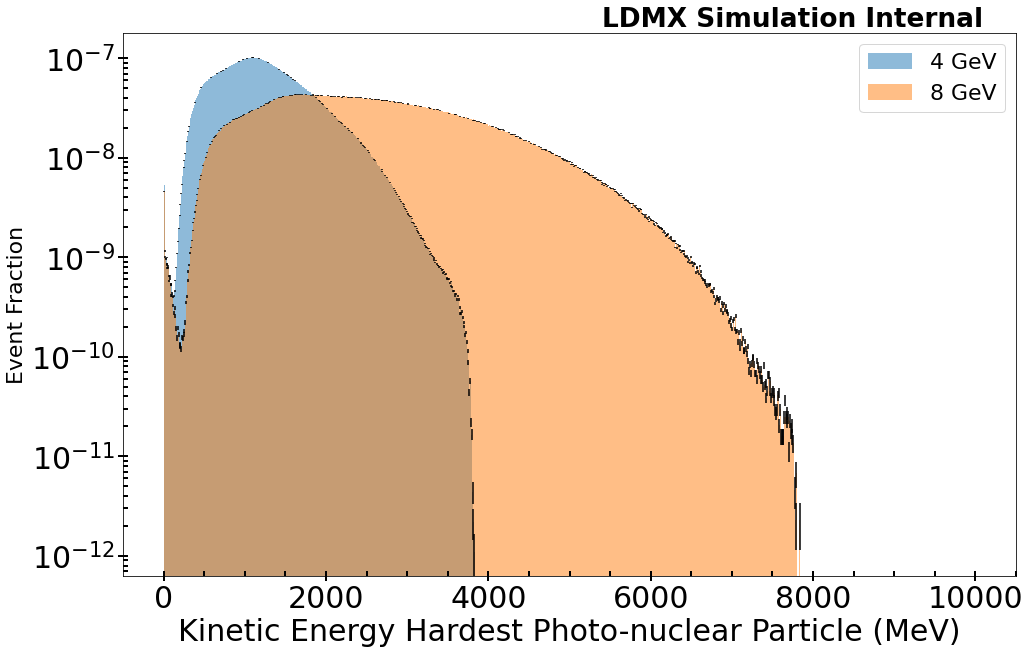

In [29]:
draw_overlay('pn/pn_hardest_ke', 'Kinetic Energy Hardest Photo-nuclear Particle (MeV)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Theta of Hardest Photo-nuclear Particle (Degrees)', ylabel='Event Fraction'>

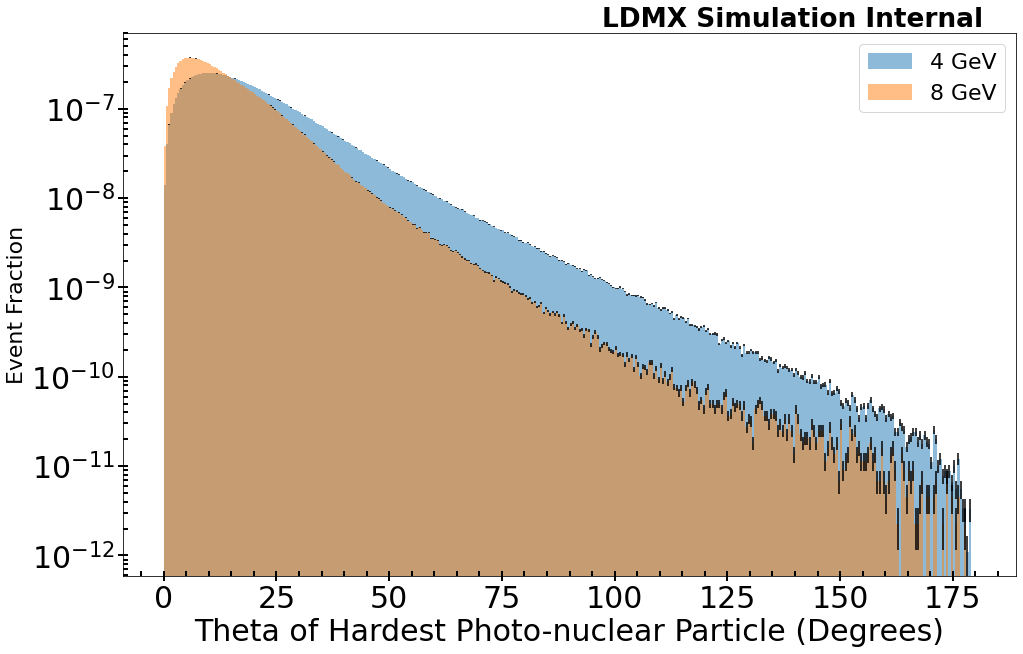

In [30]:
draw_overlay('pn/pn_hardest_theta', 'Theta of Hardest Photo-nuclear Particle (Degrees)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Kinetic Energy Hardest Photo-nuclear Proton (MeV)', ylabel='Event Fraction'>

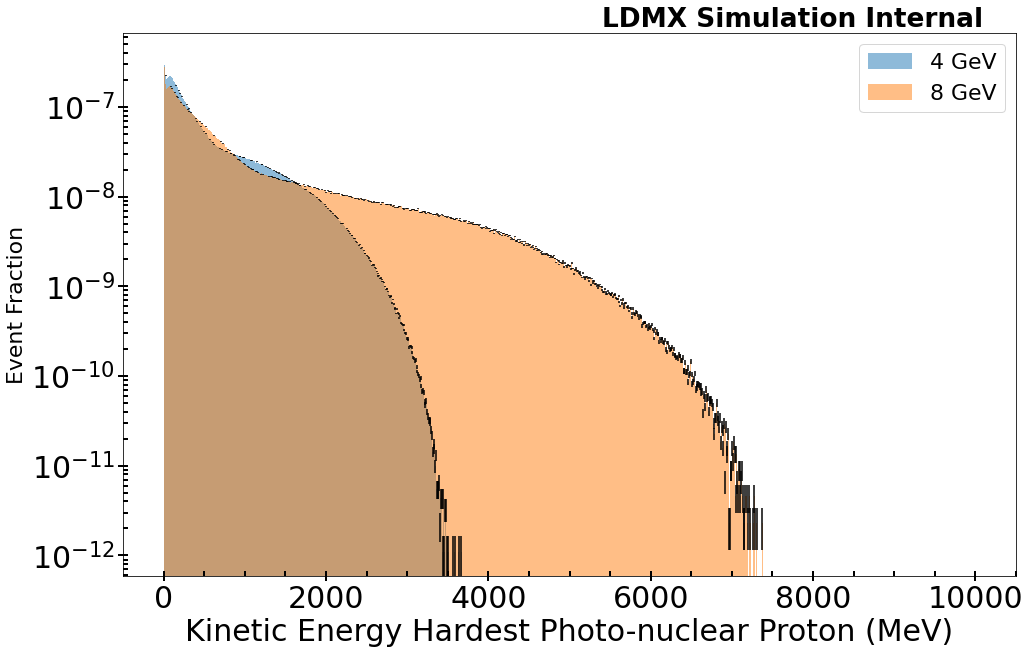

In [31]:
draw_overlay('pn/pn_hardest_p_ke', 'Kinetic Energy Hardest Photo-nuclear Proton (MeV)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Theta of Hardest Photo-nuclear Proton (Degrees)', ylabel='Event Fraction'>

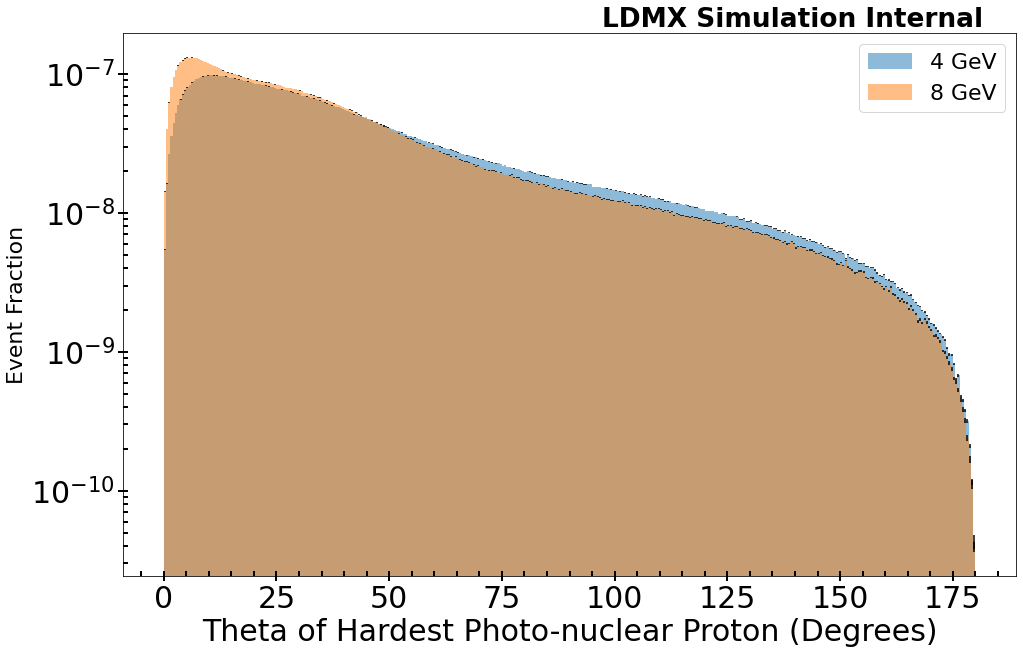

In [32]:
draw_overlay('pn/pn_hardest_p_theta', 'Theta of Hardest Photo-nuclear Proton (Degrees)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Kinetic Energy Hardest Photo-nuclear Neutron (MeV)', ylabel='Event Fraction'>

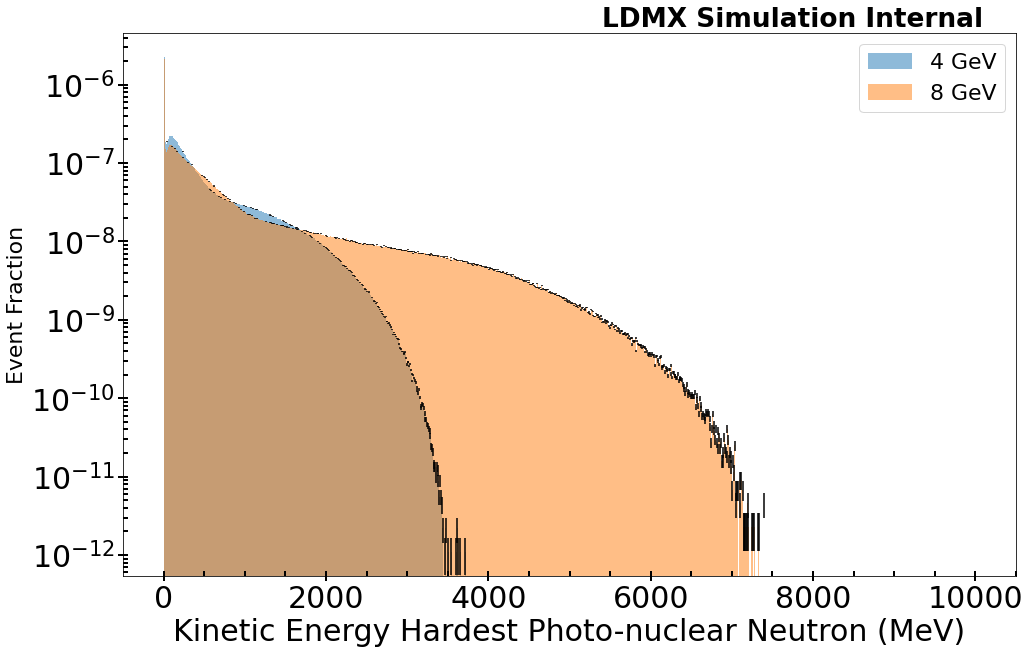

In [33]:
draw_overlay('pn/pn_hardest_n_ke', 'Kinetic Energy Hardest Photo-nuclear Neutron (MeV)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Theta of Hardest Photo-nuclear Neutron (Degrees)', ylabel='Event Fraction'>

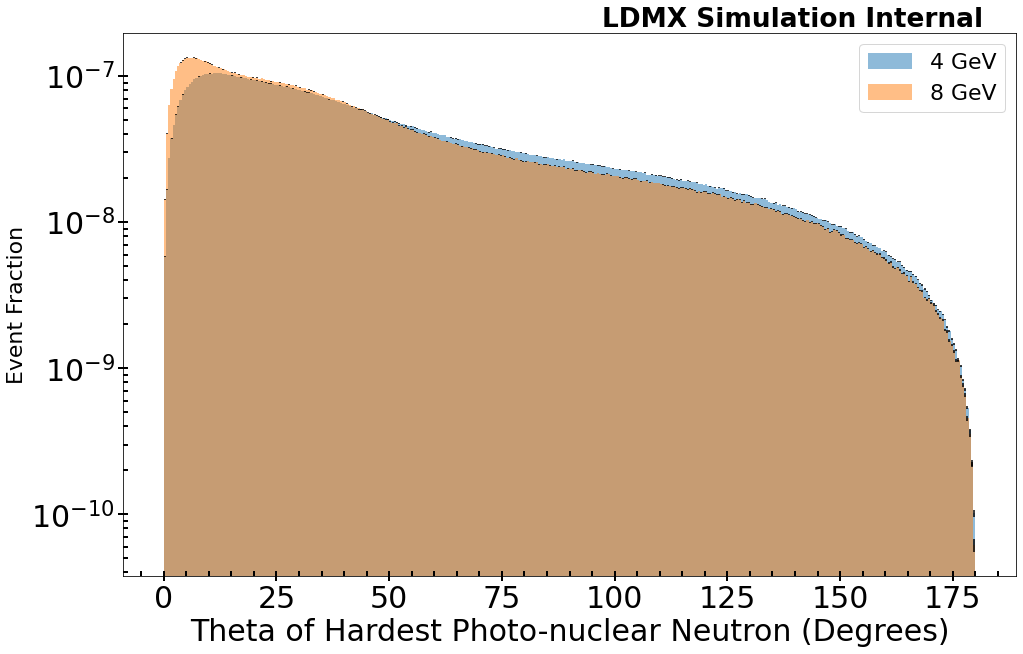

In [34]:
draw_overlay('pn/pn_hardest_n_theta', 'Theta of Hardest Photo-nuclear Neutron (Degrees)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Kinetic Energy Hardest Photo-nuclear $\\pi$ (MeV)', ylabel='Event Fraction'>

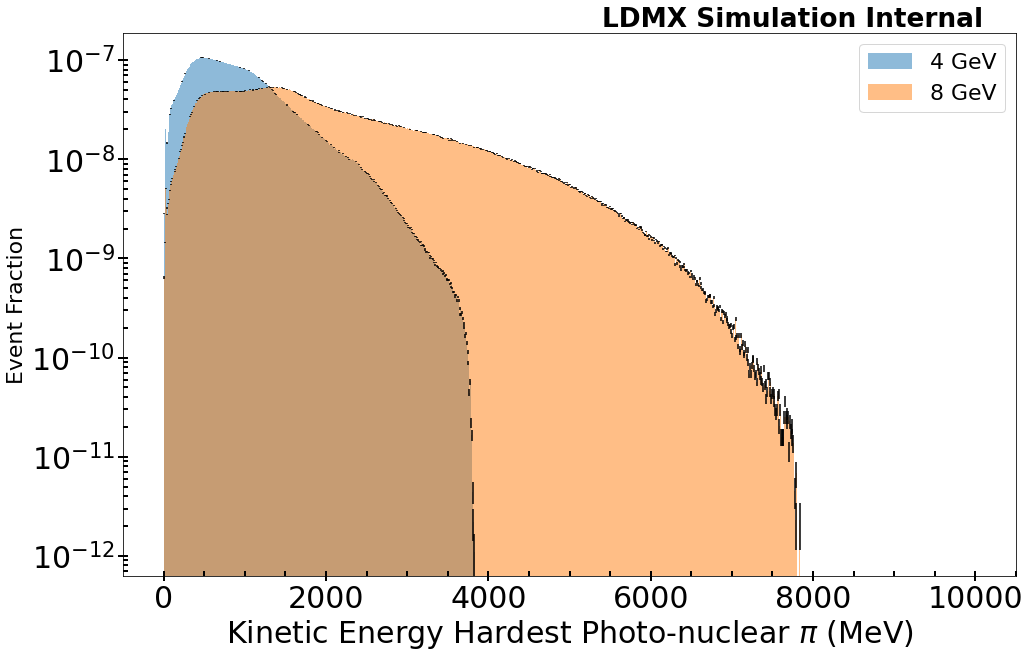

In [35]:
draw_overlay('pn/pn_hardest_pi_ke', 'Kinetic Energy Hardest Photo-nuclear $\pi$ (MeV)')

<AxesSubplot:title={'center':'LDMX Simulation Internal'}, xlabel='Theta of Hardest Photo-nuclear $\\pi$ (Degrees)', ylabel='Event Fraction'>

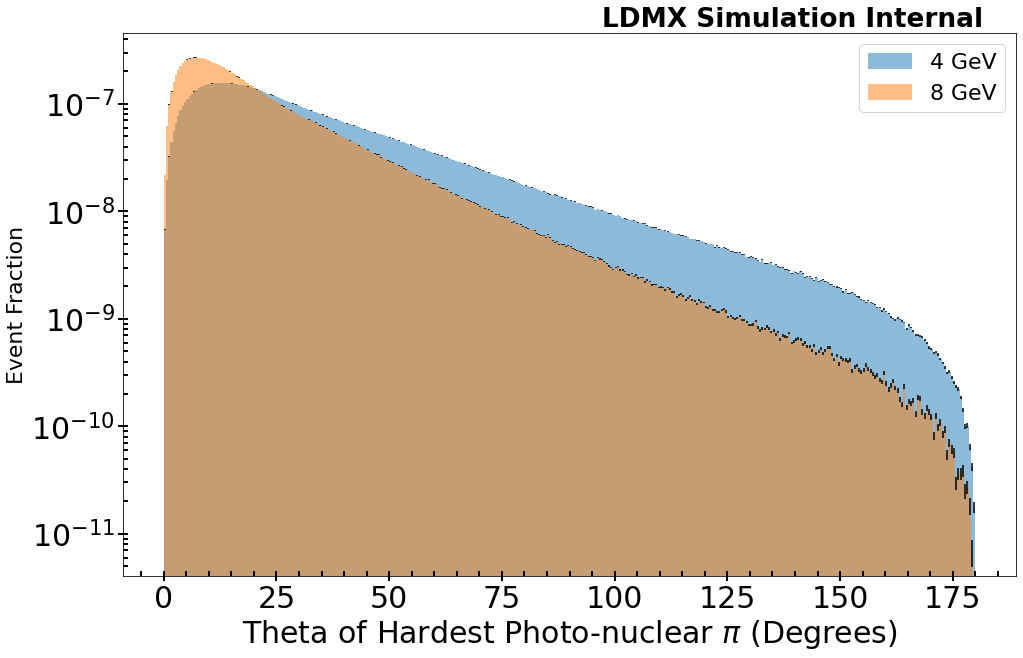

In [36]:
draw_overlay('pn/pn_hardest_pi_theta', 'Theta of Hardest Photo-nuclear $\pi$ (Degrees)')